In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import TSNE

In [2]:
inputEdge = "graph/karate.edgelist"
G = nx.read_edgelist(inputEdge, nodetype=int, create_using=nx.DiGraph())

In [3]:
G

In [13]:
import numpy as np
def loadEmbedding(file_name):
    with open(file_name, 'r') as f:
        n, d = f.readline().strip().split()
        X = np.zeros((int(n)+1, int(d)))
        for line in f:
            emb = line.strip().split()
            emb_fl = [float(emb_i) for emb_i in emb[1:]]
            X[int(emb[0]),:] = emb_fl
    return X


In [5]:
def plot_embedding2D(node_pos, node_colors=None, di_graph=None):
    node_num, embedding_dimension = node_pos.shape
    if(embedding_dimension > 2):
        print "Embedding dimensiion greater than 2, use tSNE to reduce it to 2"
        model = TSNE(n_components=2)
        node_pos = model.fit_transform(node_pos)

    if di_graph is None:
        # plot using plt scatter
        plt.scatter(node_pos[:,0], node_pos[:,1], c=node_colors)
    else:
        # plot using networkx with edge structure
        pos = {}
        for i in xrange(node_num):
            pos[i] = node_pos[i, :]
        if node_colors:
            nx.draw_networkx_nodes(di_graph, pos, node_color=node_colors, width=0.1, node_size=100, arrows=False, alpha=0.8, font_size=5)
        else:
            nx.draw_networkx(di_graph, pos, node_color=node_colors, width=0.1, node_size=300, arrows=False, alpha=0.8, font_size=12)

In [14]:
emb = loadEmbedding("emb/karate-2.emb")

In [15]:
emb

array([[ 0.      ,  0.      ],
       [ 0.647954, -1.221835],
       [ 0.26078 , -1.18105 ],
       [ 0.014604, -1.177134],
       [ 0.341933, -1.163942],
       [ 0.87369 , -1.255122],
       [ 0.987939, -1.255225],
       [ 0.891888, -1.221276],
       [ 0.2124  , -1.138424],
       [-0.105782, -1.146163],
       [ 0.078162, -1.200563],
       [ 0.660968, -1.199685],
       [ 0.194901, -1.163361],
       [ 0.332712, -1.186467],
       [ 0.053062, -1.161349],
       [-0.690653, -1.180797],
       [-0.404271, -1.148828],
       [ 0.921079, -1.241551],
       [ 0.3638  , -1.157203],
       [-0.510195, -1.145792],
       [ 0.01432 , -1.16636 ],
       [-0.726022, -1.197924],
       [ 0.443489, -1.180293],
       [-0.515541, -1.187338],
       [-0.492621, -1.158493],
       [-0.390101, -1.133154],
       [-0.411404, -1.129306],
       [-0.472089, -1.153028],
       [-0.487534, -1.146644],
       [-0.197616, -1.183069],
       [-0.334453, -1.14833 ],
       [-0.183227, -1.114288],
       [

In [16]:
plot_embedding2D(emb,node_colors=None,di_graph=G)

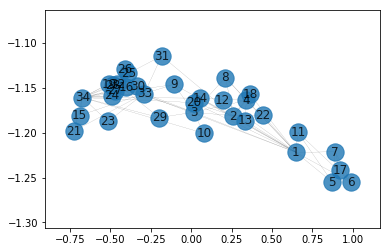

In [17]:
plt.show()

In [20]:
emb_dfs = loadEmbedding("emb/karate-2-0.2.emb")
plot_embedding2D(emb_dfs,node_colors=None,di_graph=G)

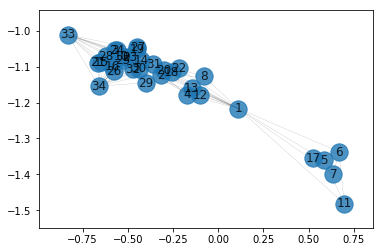

In [21]:
plt.show()

In [25]:
emb_bfs = loadEmbedding("emb/karate-2-10.emb")
plot_embedding2D(emb_bfs,node_colors=None,di_graph=G)

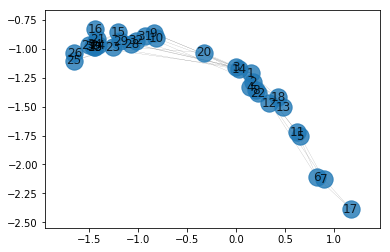

In [26]:
plt.show()